In [4]:
pip install ultralytics opencv-python matplotlib

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a pretrained YOLOv8 model (small version for speed)
model = YOLO("yolov8s.pt")



image 1/1 /content/sample.jpg: 448x640 4 persons, 1 bicycle, 7 dogs, 555.3ms
Speed: 15.2ms preprocess, 555.3ms inference, 30.3ms postprocess per image at shape (1, 3, 448, 640)


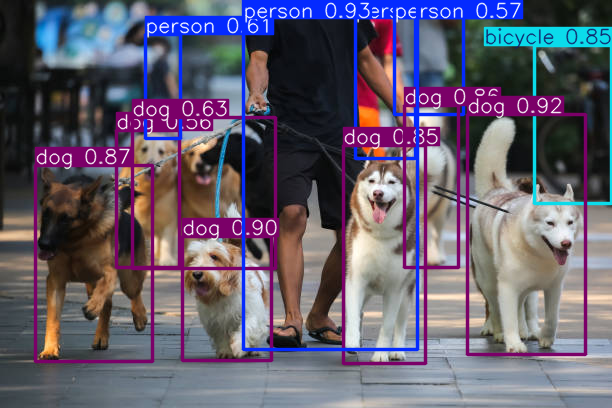

In [ ]:
# Read an image
image_path = "sample.jpg"  
img = cv2.imread(image_path)

# Run detection
results = model(image_path)  # Returns detections

# Show the results
results[0].show()  # Opens image with bounding boxes

In [8]:
import cv2
cap = cv2.VideoCapture(0)
print(cap.isOpened())
cap.release()

False


In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Apply mirror effect
            video.style.transform = 'scaleX(-1)';

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const ctx = canvas.getContext('2d');
            // Flip the captured image horizontally
            ctx.translate(canvas.width, 0);
            ctx.scale(-1, 1);
            ctx.drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();

            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js(f'takePhoto({quality})')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [10]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  # Pretrained YOLOv8 small model

<IPython.core.display.Javascript object>


image 1/1 /content/webcam.jpg: 480x640 1 person, 445.4ms
Speed: 3.4ms preprocess, 445.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


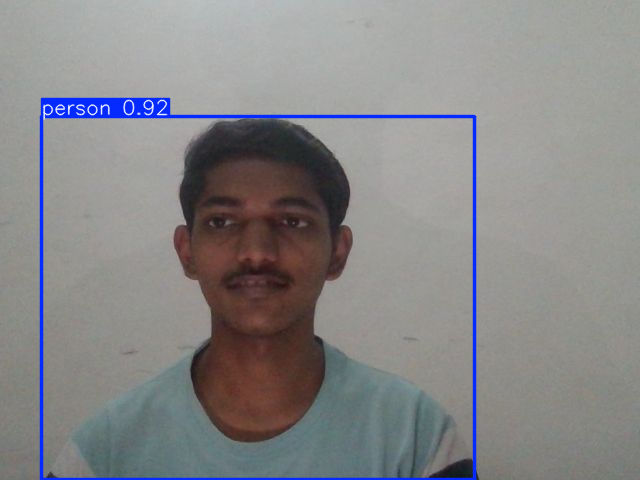

In [13]:
# Capture image from webcam
image_path = take_photo('webcam.jpg')

# Run YOLO detection
results = model(image_path)

# Show the detection results
results[0].show()
